In [31]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [32]:
# Load the data from the Excel file
df = pd.read_excel('Data_Train.xlsx')

In [33]:
print(df.head(10))

             Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    1

# Step 1: Data Preprocessing


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [35]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [36]:
missing_data = df[df['Route'].isnull() | df['Total_Stops'].isnull()]
print(missing_data)

        Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480  


In [37]:
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [39]:
df.duplicated().sum()

220

In [40]:
df.drop_duplicates(inplace = True)

In [41]:
df.duplicated().sum()

0

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


# Exploratory Data Analysis

In [44]:
df.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


In [152]:
# Convert 'Date_of_Journey' to datetime format and extract day and month
df['Journey_Day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [153]:
# Convert 'Dep_Time' and 'Arrival_Time' to datetime format and extract hour and minute
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.minute

In [154]:
# Handle 'Arrival_Time' separately due to potential date information included
arrival_times = df['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')
df['Arrival_Hour'] = pd.to_datetime(arrival_times[0], format='%H:%M').dt.hour
df['Arrival_Minute'] = pd.to_datetime(arrival_times[0], format='%H:%M').dt.minute

In [155]:
# Drop the original columns that have been transformed
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [156]:
# Convert 'Duration' to total minutes
duration = df['Duration'].str.extract(r'(?:(\d+)h)?\s*(?:(\d+)m)?')
duration = duration.fillna(0).astype(int)
df['Duration_Minutes'] = duration[0] * 60 + duration[1]

In [157]:
# Drop the original 'Duration' column
df.drop(['Duration'], axis=1, inplace=True)

In [158]:
df['Total_Stops'] = df['Total_Stops'].str.extract('(\d+)').fillna(0).astype(int)

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\205611282.py:1: SyntaxWarning:

invalid escape sequence '\d'



In [159]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0,No info,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,CCU → BLR,0,No info,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0,No info,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,BLR → DEL,0,No info,12648,1,3,11,30,14,10,160


# Visualization

In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px


In [220]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Minutes'],
      dtype='object')

* Histogram of Price Distribution

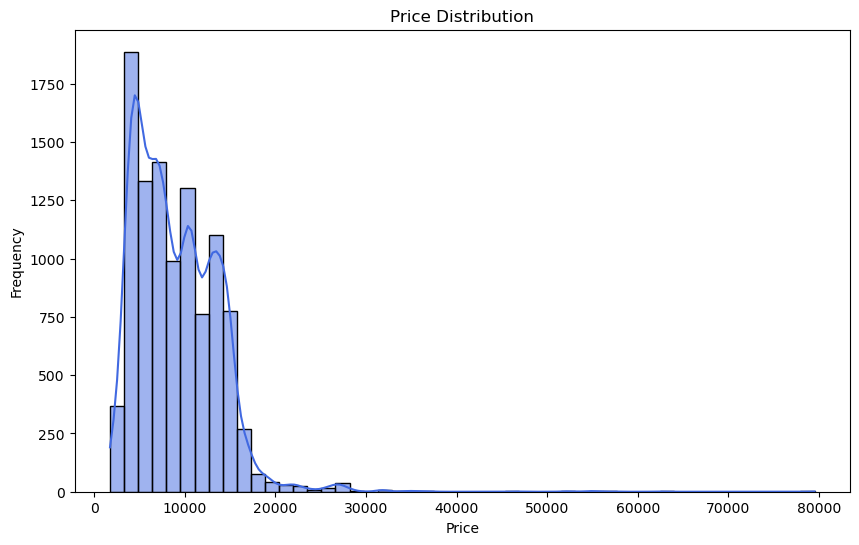

In [297]:

# Histogram for Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='royalblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [72]:
df["Source"].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

* Distribution of flights by Source

In [236]:
# Pie chart to show the distribution of flights by source
fig = px.pie(df, names='Source', title='Distribution of Flights by Source', color='Airline', 
             color_discrete_sequence=px.colors.sequential.Reds)

# Update the layout to increase the size of the pie chart
fig.update_layout(
    width=800,  # Adjust width as needed
    height=800,  # Adjust height as needed
)

fig.show()


* Histogram of Airline Distribution

In [296]:
px.histogram(data_frame=df, x="Airline", color_discrete_sequence=['royalblue'])

* Distribution of Price by Airline

In [118]:
# Create a histogram to show the distribution of prices by airline
fig = px.histogram(data_frame=df, x="Airline", y="Price", color="Airline", 
                   color_discrete_sequence=px.colors.sequential.Reds)
fig.update_layout(title="Distribution of Price by Airline", xaxis_title="Airline", yaxis_title="Price")
fig.show()

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\2039019.py:2: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



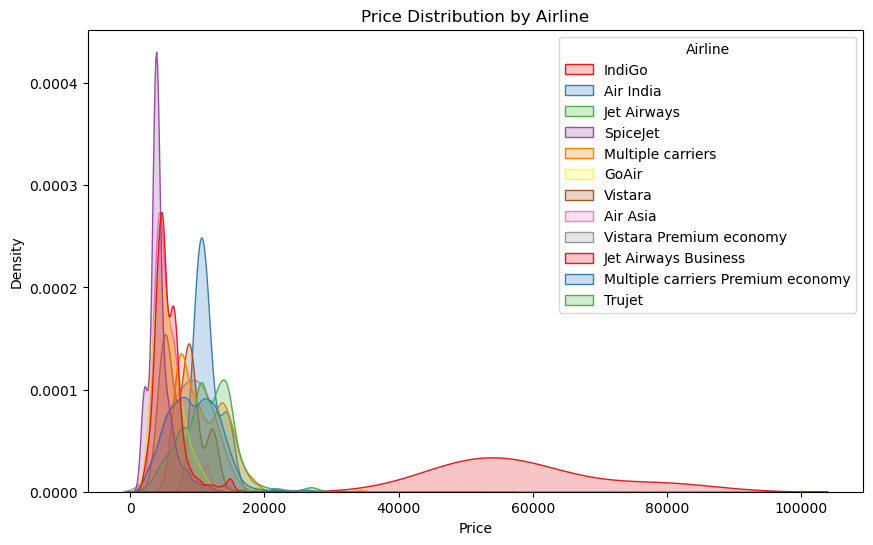

In [149]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Price", hue="Airline", fill=True, common_norm=False, palette="Set1")
plt.title("Price Distribution by Airline")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

* Distribution of Journeys by Day

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\1303638551.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\1303638551.py:2: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.



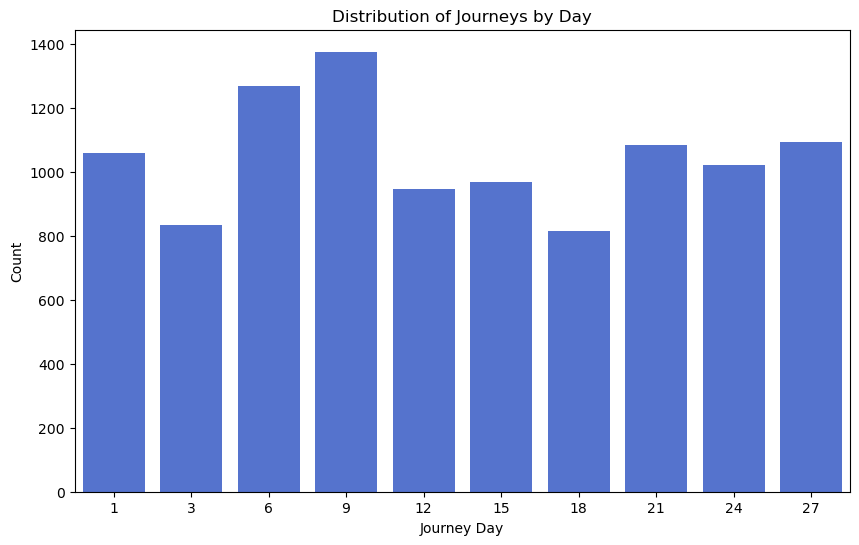

In [295]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Journey_Day', data=df, palette=['royalblue'])
plt.title('Distribution of Journeys by Day')
plt.xlabel('Journey Day')
plt.ylabel('Count')
plt.show()


* Distribution of Price by Journey_Day

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\3061915223.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




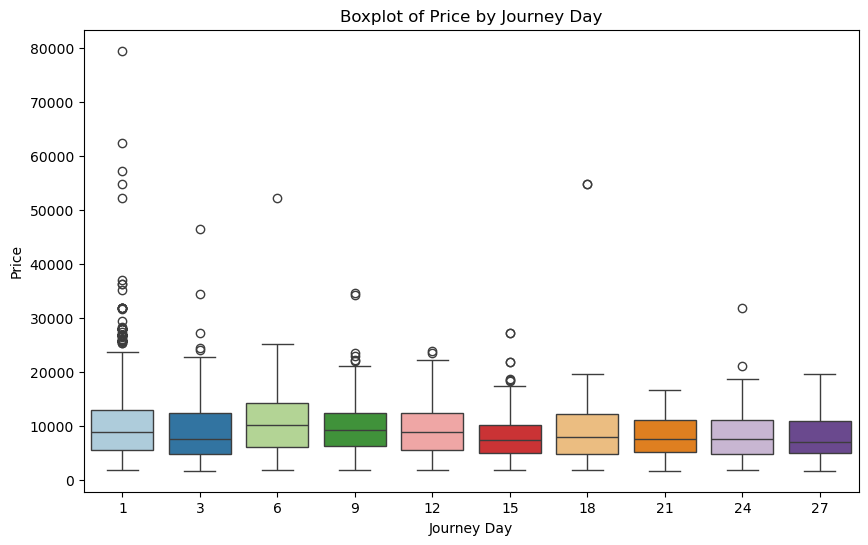

In [238]:
# Boxplot to show price distribution by Journey_Day
plt.figure(figsize=(10, 6))
sns.boxplot(x="Journey_Day", y="Price", data=df, palette="Paired")
plt.title("Boxplot of Price by Journey Day")
plt.xlabel("Journey Day")
plt.ylabel("Price")
plt.show()

boxplot helps to identify the median, quartiles, and potential outliers for each column.

* Distribution of Journeys by Month

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\904071183.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\904071183.py:2: UserWarning:


The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.



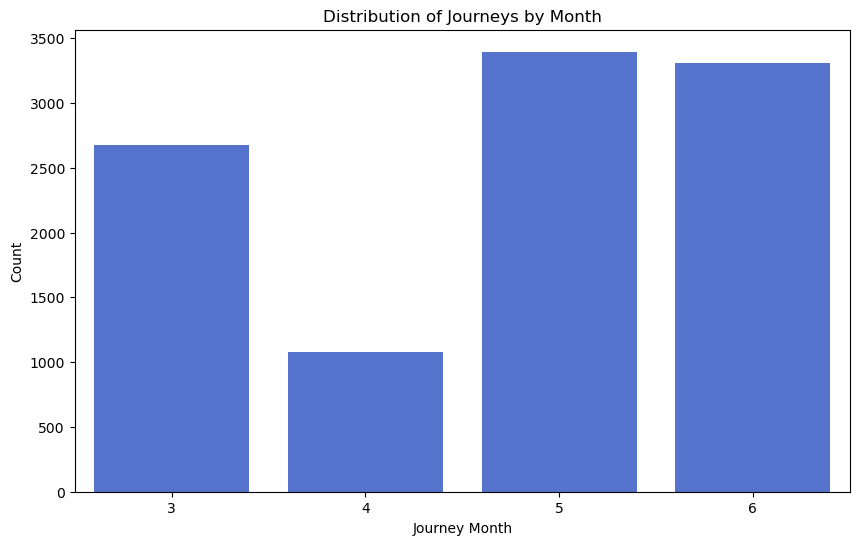

In [294]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Journey_Month', data=df, palette=['royalblue'])
plt.title('Distribution of Journeys by Month')
plt.xlabel('Journey Month')
plt.ylabel('Count')
plt.show()

* Distribution of Price by Journey_Month

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\4180503293.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




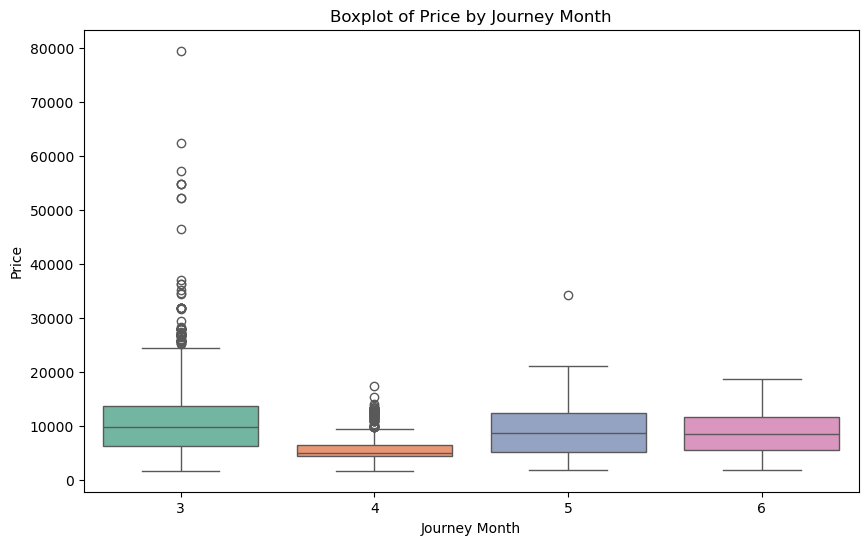

In [276]:
# Boxplot to show price distribution by Journey_Month
plt.figure(figsize=(10, 6))
sns.boxplot(x="Journey_Month", y="Price", data=df, palette="Set2")
plt.title("Boxplot of Price by Journey Month")
plt.xlabel("Journey Month")
plt.ylabel("Price")
plt.show()

*  Flight Price vs Duration by Airline

In [265]:
diverse_colors = [
    '#FF5733',  # Red-Orange
    '#33FF57',  # Green
    '#3357FF',  # Blue
    '#FF33A6',  # Pink
    '#FFD633',  # Yellow
    '#33FFF9',  # Aqua
    '#8D33FF',  # Purple
    '#FF8633',  # Tangerine
    '#85FF33',  # Lime
    '#FF3333',  # Bright Red
    '#33FF85',  # Mint Green
    '#000000'   # Black
]


In [268]:
fig = px.scatter(df, x='Duration_Minutes', y='Price', color='Airline', 
                 color_discrete_sequence=diverse_colors)
fig.update_layout(title="Price vs Duration by Airline", xaxis_title="Duration in Minutes", yaxis_title="Price")
fig.show()


* Distribution of Price by Destination

In [293]:
# Bar plot showing price distribution by destination
fig = px.bar(df, x='Destination', y='Price', color='Destination', 
             color_discrete_sequence=['royalblue'])
fig.update_layout(title="Price Distribution by Destination", xaxis_title="Destination", yaxis_title="Price")
fig.show()


* Frequency Distribution of Total Stops in Flights

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\851199053.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




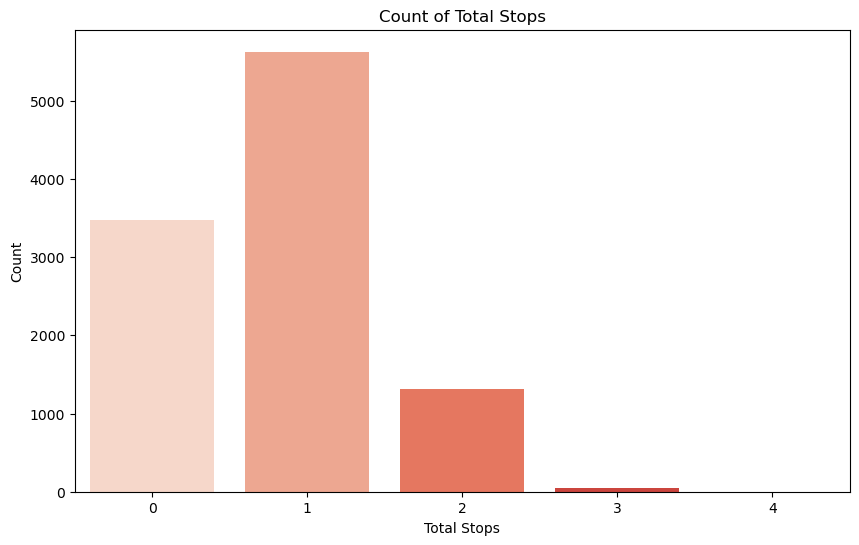

In [291]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Total_Stops', data=df, palette="Reds")
plt.title("Count of Total Stops")
plt.xlabel("Total Stops")
plt.ylabel("Count")
plt.show()


* Distribution of Price by Total Stops (Strip Plot)

C:\Users\thes Computer\AppData\Local\Temp\ipykernel_17428\4158460331.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




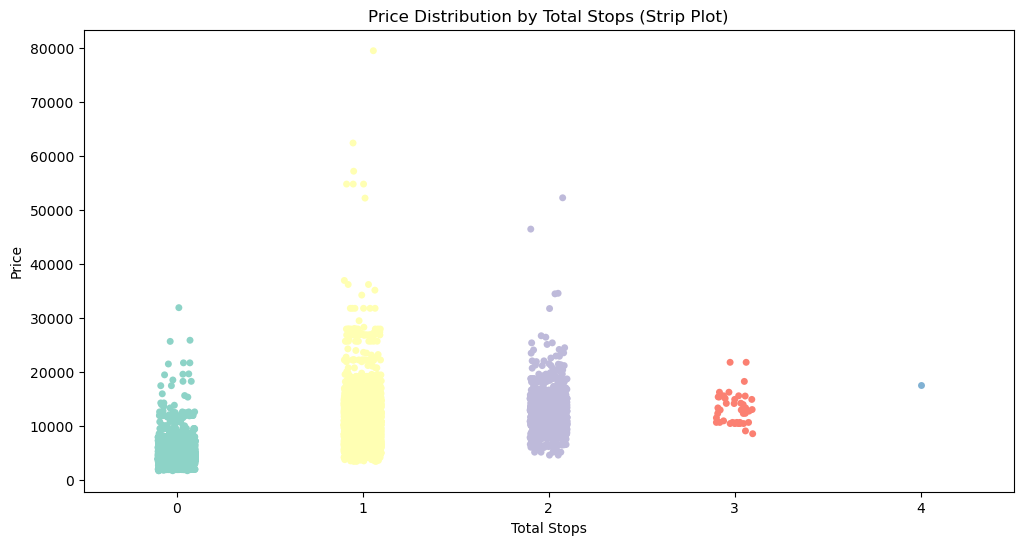

In [216]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Total_Stops', y='Price', data=df, jitter=True, palette='Set3')
plt.title('Price Distribution by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()


* Frequency Distribution of Additional Information Categories

In [292]:
px.histogram(data_frame=df, x="Additional_Info", color_discrete_sequence=['royalblue'])

* Price Distribution Across Additional Information Categories

In [273]:
# Create a histogram to show the distribution of prices by Additional_Info
fig = px.histogram(data_frame=df, x="Additional_Info", y="Price", color="Additional_Info", 
                   color_discrete_sequence=px.colors.sequential.Reds)
fig.update_layout(title="Distribution of Price by Additional_Info", xaxis_title="Additional_Info", yaxis_title="Price")
fig.show()

* Distribution of Flights by Route

In [287]:
fig = px.histogram(data_frame=df, x="Route", color="Route", 
                   color_discrete_sequence=px.colors.sequential.Reds)
fig.update_layout(
    title="Distribution of Flights by Route",
    xaxis_title="Route",
    yaxis_title="Count"
)
fig.show()

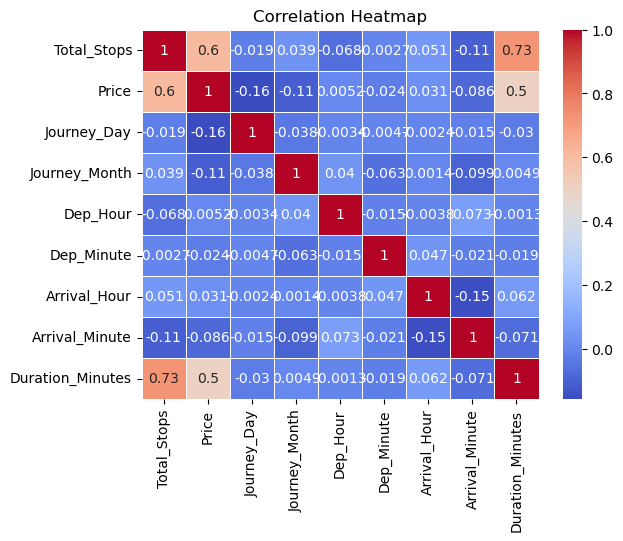

In [79]:

numeric_df = df.select_dtypes(include=['int'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Route             10462 non-null  object
 4   Total_Stops       10462 non-null  int32 
 5   Additional_Info   10462 non-null  object
 6   Price             10462 non-null  int64 
 7   Journey_Day       10462 non-null  int32 
 8   Journey_Month     10462 non-null  int32 
 9   Dep_Hour          10462 non-null  int32 
 10  Dep_Minute        10462 non-null  int32 
 11  Arrival_Hour      10462 non-null  int32 
 12  Arrival_Minute    10462 non-null  int32 
 13  Duration_Minutes  10462 non-null  int32 
dtypes: int32(8), int64(1), object(5)
memory usage: 899.1+ KB


In [81]:
# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10462 non-null  int32
 1   Source            10462 non-null  int32
 2   Destination       10462 non-null  int32
 3   Route             10462 non-null  int32
 4   Total_Stops       10462 non-null  int32
 5   Additional_Info   10462 non-null  int32
 6   Price             10462 non-null  int64
 7   Journey_Day       10462 non-null  int32
 8   Journey_Month     10462 non-null  int32
 9   Dep_Hour          10462 non-null  int32
 10  Dep_Minute        10462 non-null  int32
 11  Arrival_Hour      10462 non-null  int32
 12  Arrival_Minute    10462 non-null  int32
 13  Duration_Minutes  10462 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 694.7 KB


In [83]:
df.to_excel('Data_Processed.xlsx', index=False)

## Step 2: Modeling 




In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# from xgboost import XGBClassifier

In [4]:
df_Processed = pd.read_excel('Data_Processed.xlsx')

In [5]:
X = df_Processed.drop(['Price'], axis=1)
y = df_Processed['Price']

In [6]:
Num_Columns = X.select_dtypes(include="number")

In [7]:
Num_Steps = [
    ("Num_Imputer", KNNImputer()),  
    ("Scaler", StandardScaler())   
]
Num_Pipeline = Pipeline(steps=Num_Steps)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
models = {
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "LinearRegression": LinearRegression(),
    "SVR": SVR()
}

In [10]:
results = {}

for model_name, model in models.items():
    cv_results = cross_validate(
        estimator=model,
        X=X,
        y=y,
        scoring=['neg_mean_squared_error', 'r2'],
        cv=5,  # Number of folds
        return_train_score=True
    )
    
    # Calculate average performance metrics
    avg_train_r2 = cv_results['train_r2'].mean()
    avg_test_r2 = cv_results['test_r2'].mean()
    avg_train_mse = -cv_results['train_neg_mean_squared_error'].mean()
    avg_test_mse = -cv_results['test_neg_mean_squared_error'].mean()
    
    results[model_name] = {
        "Mean Train MSE": avg_train_mse,
        "Mean Test MSE": avg_test_mse,
        "Mean Train R2": avg_train_r2,
        "Mean Test R2": avg_test_r2,
        "Overfitting": avg_train_r2 - avg_test_r2 > 0.1
    }


In [11]:
# Display results
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Mean Train MSE: {result['Mean Train MSE']}")
    print(f"Mean Test MSE: {result['Mean Test MSE']}")
    print(f"Mean Train R2: {result['Mean Train R2']}")
    print(f"Mean Test R2: {result['Mean Test R2']}")
    print(f"Overfitting: {result['Overfitting']}")
    print("-" * 30)

Model: RandomForestRegressor
Mean Train MSE: 1045724.8405352337
Mean Test MSE: 2701233.3460823377
Mean Train R2: 0.9510973353192937
Mean Test R2: 0.8741011594707031
Overfitting: False
------------------------------
Model: LinearRegression
Mean Train MSE: 12053719.215419678
Mean Test MSE: 12097366.409951484
Mean Train R2: 0.43639367045715993
Mean Test R2: 0.4341878954299518
Overfitting: False
------------------------------
Model: SVR
Mean Train MSE: 18156081.045897327
Mean Test MSE: 18160431.544410683
Mean Train R2: 0.15105219118613583
Mean Test R2: 0.15078922486209115
Overfitting: False
------------------------------


In [12]:
pipeline = Pipeline([
    ("model", RandomForestRegressor())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model = pipeline.named_steps["model"]
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)


print(f"Model:RandomForestRegressor")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Training Score: {round(train_score*100,2)} %")
print(f"Testing Score: {round(test_score*100,2)} %")
print(f"Overfitting: {train_score - test_score > 0.1}")
print("-" * 30)

Model:RandomForestRegressor
Mean Squared Error: 2326037.4694129582
R2 Score: 0.8884409286834428
Training Score: 97.93 %
Testing Score: 88.84 %
Overfitting: False
------------------------------


# Hyperparameter Tuning

In [13]:
pipeline["model"].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
modeel= RandomForestRegressor()
param={}
param = {
    'regressor': [modeel],
    'regressor__n_estimators': [100, 200, 300,400],  # Changed 'model__' to 'regressor__'
    'regressor__max_depth': [None,3, 5,]  # Changed 'model__' to 'regressor__'
}

In [15]:
pipeline_best = Pipeline([
    ("regressor", modeel)
])
params=[param]

In [16]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_search = GridSearchCV(pipeline_best, params, cv=3, return_train_score=True).fit(X_train, y_train)

In [17]:
grid_search.best_params_

{'regressor': RandomForestRegressor(),
 'regressor__max_depth': None,
 'regressor__n_estimators': 300}

In [18]:
print(round(grid_search.cv_results_["mean_test_score"].mean()*100,2),"%")

69.92 %


In [19]:
print(round(grid_search.best_score_*100,2),'%')

86.07 %


In [20]:
print(round(grid_search.cv_results_["mean_test_score"].mean()*100,2),"%")
print(round(grid_search.cv_results_["mean_train_score"].mean()*100,2),"%")

69.92 %
76.62 %


In [21]:
grid_search.best_estimator_

Pipeline(steps=[('regressor', RandomForestRegressor(n_estimators=300))])

In [22]:
pipeline = Pipeline([
    ("model", RandomForestRegressor())
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model = pipeline.named_steps["model"]
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)


print(f"Training Score: {round(train_score*100,2)} %")
print(f"Testing Score: {round(test_score*100,2)} %")

print(f"Model:RandomForestRegressor")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print(f"Overfitting: {train_score - test_score > 0.1}")
print("-" * 30)

Training Score: 98.03 %
Testing Score: 88.84 %
Model:RandomForestRegressor
Mean Squared Error: 2326411.91216759
R2 Score: 0.88842297003638
Overfitting: False
------------------------------


# Model Saving & Deployment

In [24]:
import joblib
import pandas as pd
import streamlit as st

In [27]:
print(X.columns)
print(pipeline)

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Minutes'],
      dtype='object')
Pipeline(steps=[('model', RandomForestRegressor())])


In [25]:

joblib.dump(pipeline , "Third_Group.pkl")
joblib.dump(X.columns,"Inputs.pkl")

['Inputs.pkl']

In [30]:

# Load the model and input features
model = joblib.load("Third_Group.pkl")
inputs = joblib.load("Inputs.pkl")

# Function for prediction
def prediction(Airline, Source, Destination, Total_Stops, Journey_Day, Journey_Month, Duration_Hours, Duration_Minutes, Dep_Hour, Dep_Minute):
    df = pd.DataFrame(columns=inputs)
    df.at[0, "Airline"] = Airline
    df.at[0, "Source"] = Source
    df.at[0, "Destination"] = Destination
    df.at[0, "Total_Stops"] = Total_Stops
    df.at[0, "Journey_Day"] = Journey_Day
    df.at[0, "Journey_Month"] = Journey_Month
    df.at[0, "Duration_Hours"] = Duration_Hours
    df.at[0, "Duration_Minutes"] = Duration_Minutes
    df.at[0, "Dep_Hour"] = Dep_Hour
    df.at[0, "Dep_Minute"] = Dep_Minute
    result = model.predict(df)[0]
    return result

# Main application
def main():
    st.markdown(
        """
        <style>
        body {
            font-family: 'Press Start 2P', cursive;
            color: #FFFFFF;
            background-color: #1E1E1E;
        }
        .stButton>button {
            background-color: #00BFFF;
            color: #FFFFFF;
            font-size: 18px;
            border-radius: 5px;
        }
        </style>
        """,
        unsafe_allow_html=True
    )

    st.title("Flight Fare Prediction")

    # Tabs for navigation
    tab1, tab2 = st.tabs(["About the App", "Prediction"])

    with tab1:
        st.image("https://dejpknyizje2n.cloudfront.net/media/carstickers/versions/airplane-mail-plane-pixel-art-sticker-u8a44-x450.png")
        st.write(
            "Welcome to the Flight Fare Prediction App! This application helps users estimate flight ticket prices "
            "based on various travel factors such as airline, source, destination, and journey details."
        )
        st.write(
            "### About the Developer\n"
            "Passionate about data science and machine learning, my goal is to leverage technology to create solutions that matter."
        )

    with tab2:
        st.header("Flight Fare Prediction")

        # Input fields
        Airline = st.selectbox("Airline", [0, 1, 2])
        Source = st.selectbox("Source", [0, 1, 2])
        Destination = st.selectbox("Destination", [0, 1, 2])
        Total_Stops = st.selectbox("Total Stops", [0, 1, 2])
        Journey_Day = st.slider("Journey Day", min_value=1, max_value=31, step=1)
        Journey_Month = st.slider("Journey Month", min_value=1, max_value=12, step=1)
        Duration_Hours = st.slider("Duration Hours", min_value=0, max_value=24, step=1)
        Duration_Minutes = st.slider("Duration Minutes", min_value=0, max_value=59, step=1)
        Dep_Hour = st.slider("Departure Hour", min_value=0, max_value=23, step=1)
        Dep_Minute = st.slider("Departure Minute", min_value=0, max_value=59, step=1)

        if st.button("Predict Fare"):
            result = prediction(Airline, Source, Destination, Total_Stops, Journey_Day, Journey_Month, Duration_Hours, Duration_Minutes, Dep_Hour, Dep_Minute)
            st.success(f"Estimated Ticket Price: {result:.2f}")

if __name__ == "__main__":
    main()


2024-12-24 15:37:54.850 Session state does not function when running a script without `streamlit run`
